# Modelling  Cadmium Exposure -R_codes

Installing Libraries  for the analysis

In [1]:
library(tidyverse)
library(dplyr)
library(plyr)
library(R2jags)
library(ggplot2)
library(nlme)
library(standardize)
library(MCMCvis)
library(bayesplot)
library(coda)
library(batchmeans)
library(lattice)
library(ggmcmc)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.3
v tibble  3.0.0     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'plyr' was built under R version 3.6.3"------------------------------------------------------------------------------
You 

In [3]:
cadmium <- read.csv("C:\\Users\\NSOH TANIH\\OneDrive\\Documents\\bayesian inference\\level 2_2\\Bayesian2021\\exposure cadmium.csv",
                    sep = ';',dec = ',')
head(cadmium)

,houseid,person,age,weight,sex,ur,provinceid,exmd
,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<int>,<dbl>
1,461211001,1,38,56.5,Female,Urban,46,0.5231271
2,461211001,2,48,67.1,Male,Urban,46,0.5689451
3,461211003,1,44,65.1,Male,Urban,46,1.0687778
4,461211003,2,43,52.5,Female,Urban,46,1.3235232
5,461211004,1,53,57.7,Male,Urban,46,0.5700269
6,461211004,2,49,49.8,Female,Urban,46,0.5940210


converting exmb to log form

In [9]:
cadmium$logy <- log(cadmium$exmd)
head(cadmium)

,houseid,person,age,weight,sex,ur,provinceid,exmd,logy
,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>
1,461211001,1,38,56.5,Female,Urban,46,0.5231271,-0.64793082
2,461211001,2,48,67.1,Male,Urban,46,0.5689451,-0.56397133
3,461211003,1,44,65.1,Male,Urban,46,1.0687778,0.06651575
4,461211003,2,43,52.5,Female,Urban,46,1.3235232,0.28029727
5,461211004,1,53,57.7,Male,Urban,46,0.5700269,-0.56207173
6,461211004,2,49,49.8,Female,Urban,46,0.5940210,-0.52084061


###
cadmium$exmd <- as.numeric(cadmium$exmd)
cadmium$weight <- as.numeric(cadmium$weight)
mean(cadmium$exmd)

In [ ]:
Summary statistics of all variables.

In [4]:

####
summary(cadmium$exmd)
summary(cadmium$person)
summary(cadmium$age)
summary(cadmium$weight)
summary(cadmium$sex)
summary(cadmium$ur)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1836  0.4266  0.5359  0.5802  0.6795  1.6606 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.835   2.000   8.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   33.00   39.50   41.29   49.00   64.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  38.00   55.02   60.86   62.42   67.66  100.31 

Female   Male 
   523    483

Rural Urban 
  340   666

## Distribution of Numeric Variables



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


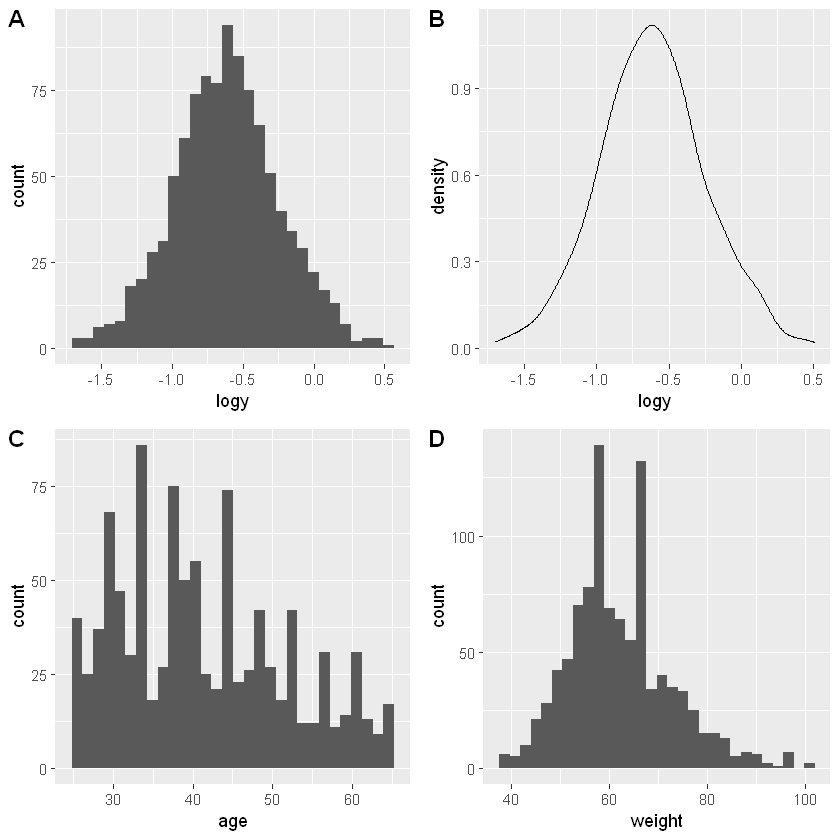

In [25]:
######Histogram
library(cowplot)
par(mfrow=c(2,1))
a <- ggplot(cadmium, aes(x=logy))+geom_histogram()
d <- ggplot(cadmium, aes(x=logy))+geom_density()
b <- ggplot(cadmium, aes(x=age))+geom_histogram()
c<- ggplot(cadmium, aes(x=weight))+geom_histogram()

plot_grid(a,d,b,c, labels = "AUTO")

In [26]:
task1 <- cadmium

In [27]:
task1.list <- with(task1, list(y = logy, n = nrow(task1)))

In [28]:
task1 <- "model {
        #Likelihood
        for (i in 1:n) {
          y[i] ~ dnorm(mu[i],tau)
          mu[i] <- beta0
          y.err[i] <- y[i] - mu[i]
        }
        
        #Priors
        beta0 ~ dnorm(0.0,1.0E-6)
        tau <- 1 / (sigma * sigma)
        sigma2 <- 1/tau
        sigma~dgamma(0.001,0.001)
      }"

set.seed(11)
params =c('beta0','sigma2') 
writeLines(task1,con='task1.bug')

task1 <- R2jags::jags(model='task1.bug', data=task1.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=50000, n.thin=5, n.burnin=15000)
stats::update(task1, 1e3)

module glm loaded


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1006
   Unobserved stochastic nodes: 2
   Total graph size: 2022

Initializing model



## Across all subjects and irrespective of the covariates, what is the 95 percentile and 99 percentile of exposure?

In [30]:

print(task1,digits=3,intervals=c(0.025,0.75,0.95,0.99))

Inference for Bugs model at "task1.bug", fit using jags,
 3 chains, each with 50000 iterations (first 15000 discarded), n.thin = 5
 n.sims = 21000 iterations saved
         mu.vect sd.vect    2.5%     75%     95%     99%  Rhat n.eff
beta0     -0.613   0.012  -0.636  -0.605  -0.594  -0.586 1.001 14000
sigma2     0.137   0.006   0.125   0.141   0.147   0.152 1.001 21000
deviance 852.225   1.995 850.269 853.014 856.231 859.340 1.001 21000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 2.0 and DIC = 854.2
DIC is an estimate of expected predictive error (lower deviance is better).


In [ ]:
### Check convergence using classical diagnostics
task1.fit.mcmc <- as.mcmc(task1)
#par(mfrow=c(2,4))
mod1 <- ggs(task1.fit.mcmc)

###trace plots
ggs_traceplot(mod1)

###autocorrelation
ggs_autocorrelation(mod1)

###Gelman and Rubin's plot
gelman.plot(task1.fit.mcmc)

##cross -correlation of parameters
ggs_crosscorrelation(mod1)

##ggs_ppmean(mod1,outcome = 'mu')
###Histograms
ggplot(cadmium, aes(x=logy))+geom_histogram() + geom_vline(xintercept=-0.613,color ='blue') +
  xlab("log Cadmium")

## What are the factors that influence the distribution of median values?

### Now include the covariates and again estimate the 95%-ile and 99%-ile of the exposures and their uncertainty as a function of the covariates. Explore whether the variance of the exposures varies with the covariate values

In [ ]:
#########
##Here i fit regression model with all variables,
###recoding variable  sex and ur;
cadmium$sex <- ifelse(cadmium$sex == 'Male', 1, 0)  ### Male=1, female = 0
cadmium$ur <- ifelse(cadmium$ur == 'Urban', 1, 0) #### Urban=1, rural= 0

###
cadmium$exmd <- as.numeric(cadmium$exmd)
cadmium$weight <- as.numeric(cadmium$weight)
cadmium$age <- as.numeric(cadmium$age)
cadmium$sex <- as.factor(cadmium$sex)
cadmium$ur <- as.factor(cadmium$ur)
cadmium$logy <- log(cadmium$exmd)
####

#######count of unique househould id

(NSUB1<-length(which(plyr::count(cadmium,vars="houseid") == 1))+
    length(which(plyr::count(cadmium,vars="houseid") == 2))+
    length(which(plyr::count(cadmium,vars="houseid") == 3))+
    length(which(plyr::count(cadmium,vars="houseid") == 4))+
    length(which(plyr::count(cadmium,vars="houseid") == 5))+
    length(which(plyr::count(cadmium,vars="houseid") == 6))+
    length(which(plyr::count(cadmium,vars="houseid") == 7)))

#################



#######centering all numeric variables
task2 <- cadmium
#task2 <- within(task2, {
 # age <- as.numeric(scale(age, scale = FALSE))
  #weight <- as.numeric(scale(weight, scale = FALSE))
#})

#################### making list of all variables
task2.list <- with(task2, list(y = logy,age=age, weight=weight, sex=sex, ur=ur, n = nrow(task2)))

###model
task2 <- "model {
        #Likelihood
        for (iobs in 1:n) {
          y[iobs] ~ dnorm(mu[iobs],tau) 
          
          mu[iobs] <- beta0 + beta1*age[iobs] + beta2*weight[iobs] + beta3*sex[iobs] + beta4*ur[iobs]
          
          # ordinary residual
        r[iobs] <- y[iobs] - mu[iobs]
        
     # Studentized residuals 
    t1[iobs] <- r[iobs]/sigma
    #t2[iobs] <- r[iobs]/(sigma*sqrt(1-h[iobs]))
    
    # PPOi
    log.ppo[iobs] <- -0.5*log(tau) - 0.5*tau*pow(y[iobs]-mu[iobs],2)
    ppo[iobs] <- exp(log.ppo[iobs])
    
    # basis for computing CPO
    icpo[iobs]  <- 1/ppo[iobs]
    
              }
        
                  
        #Priors
        beta0 ~ dnorm(0.0,1.0E-6)   
        beta1 ~ dnorm(0.0,1.0E-6)  
        beta2 ~ dnorm(0.0,1.0E-6)  
        beta3 ~ dnorm(0.0,1.0E-6) 
        beta4 ~ dnorm(0.0,1.0E-6) 
        tau ~ dunif(0,1000)
        sigma2 <- 1/tau
        sigma <- 1 / sqrt(tau)
       
        
                                
      }"

set.seed(11)
#params =c('beta0','beta1','beta2','beta3','beta4','tau','r','t1','ppo','icpo') 
params =c('sigma2') 
writeLines(task2,con='task2.bug')

task2 <- R2jags::jags(model='task2.bug', data=task2.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)
stats::update(task2, 1e3)

task2_ouput <- task2
task2_ouput_results <- as.data.frame(MCMCsummary(task2_ouput, round = 3))
####
print(task2,digits=3,intervals=c(0.025,0.75,0.95,0.99))


#MCMC error: Method of batch mean
mcmc_LR <- batchSE(as.mcmc(task2_ouput), batchSize=100)
mcmc_LR<- as.vector(mcmc_LR)
formatC(mcmc_LR,format="fg")


###########################################################################################################
#######################Convergence for linear model#######################################################
###########################################################################################################

### Check convergence using classical diagnostics
task2.fit.mcmc <- as.mcmc(task2)
#par(mfrow=c(2,4))
LR <- ggs(task2.fit.mcmc)

###trace plots
ggs_traceplot(LR)
#traceplot(task2.fit.mcmc)
#xyplot(task2.fit.mcmc, layout=c(3,4), aspect="fill")
#plot(task2.fit.mcmc)
###Gelman and Rubin's plot
gelman.plot(task2.fit.mcmc)
###autocorrelation
ggs_autocorrelation(LR)
#autocorr.plot(task2.fit.mcmc,auto.layout = FALSE)
##cross -correlation of parameters
ggs_crosscorrelation(LR,absolute_scale = FALSE)


###########################################################################################################
#######################OUTPUT FOR STANDARD RESIDUAL#######################################################
###########################################################################################################
set.seed(11)
params =c('t1') 
writeLines(task2,con='task2.bug')
task2 <- R2jags::jags(model='task2.bug', data=task2.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)
stats::update(task2, 1e3)
##index
index<- as.data.frame(index <- seq(1, 1006, by=1))
names(index)[names(index) == 'index <- seq(1, 1006, by = 1)'] <- 'index'
####output for standardised residuals(r)
test_stand <- as.data.frame(MCMCsummary(task2, round = 3))
test_stand <- test_stand[-c(1), ]
test_stand <- cbind.data.frame(test_stand,index)
##standardized residuals PLOT
ggplot(test_stand, aes(y=mean,x=index))+geom_point()+
  geom_hline(yintercept=2,color ='blue')+geom_hline(yintercept=-2,color ='blue')+
  ggtitle("Detecting Outlying Standardized Residuals") +
  xlab("index") + ylab("Standardized Residuals")

###########################################################################################################
#######################creating a new dataset without outliers to test for inflence#######################################################
###########################################################################################################
test_stand <- cbind.data.frame(test_stand,cadmium)
##deleting observations >2 and <-2
infle <- subset(test_stand, mean < 2 & mean > -2)

task22.list <- with(infle, list(y = logy,age=age, weight=weight, sex=sex, ur=ur, n = nrow(infle)))
###
set.seed(11)
params =c('beta0','beta1','beta2','beta3','beta4','sigma2') 
writeLines(task2,con='task2.bug')
task22 <- R2jags::jags(model='task2.bug', data=task22.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)
stats::update(task22, 1e3)

task22_ouput <- task22
#MCMC error: Method of batch mean
mcmc_LR <- batchSE(as.mcmc(task22), batchSize=100)
mcmc_LR<- as.vector(mcmc_LR)
formatC(mcmc_LR,format="fg")




###########################################################################################################
#######################OUTPUT FOR CPO#######################################################
###########################################################################################################
set.seed(11)
params =c('icpo') 
writeLines(task2,con='task2.bug')
task2 <- R2jags::jags(model='task2.bug', data=task2.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)
stats::update(task2, 1e3)
####output for cpo
test_cpo<- as.data.frame(MCMCsummary(task2, round = 3))
test_cpo <- test_cpo[-c(1), ]
test_cpo<- cbind.data.frame(test_cpo,index)
##CPO
test_cpo$in_cpo <- 1/(test_cpo$mean)
###Influencial observations using cpo
ggplot(test_cpo, aes(y=mean,x=index))+geom_point()+
  ggtitle("Index Plot of 1/CPO") +
  xlab("index") + ylab("1/CPO") 
##+scale_y_continuous(limits = c(0, 250000))

###########################################################################################################
#######################OUTPUT FOR PPO#######################################################
###########################################################################################################
set.seed(11)
params =c('ppo') 
writeLines(task2,con='task2.bug')
task2 <- R2jags::jags(model='task2.bug', data=task2.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)
stats::update(task2, 1e3)
####output for ppo
test_ppo<- as.data.frame(MCMCsummary(task2, round = 3))
test_ppo <- test_ppo[-c(1), ]
test_ppo<- cbind.data.frame(test_ppo,index)
summary(test_ppo$mean)
test_ppo$std <- ((test_ppo$mean)/(0.3300)) 

####making relative difference of cpo vs ppo plot
test_cpo$mean_cpo <- test_cpo$mean
test_ppo$mean_ppp <- test_ppo$mean
ppo_cpo <- cbind.data.frame(test_ppo,test_cpo)
ppo_cpo$new <- (100*(test_cpo$in_cpo - test_ppo$mean)/(test_ppo$mean))

ppo_cpo2 <- subset.data.frame(ppo_cpo, select = c("mean_ppp","new"))


###Relative difference of CPO vs PPO 
ggplot(ppo_cpo2, aes(y=ppo_cpo$new,x=ppo_cpo$mean_ppp))+geom_point()+
  ggtitle("Relative difference of CPO vs PPO") +
  xlab("PPO") + ylab("(CPO-PPO)/PP0 %") + scale_y_continuous(limits = c(-20, 0))

###Index Plot of ppo 
ggplot(test_ppo, aes(y=std,x=index))+geom_point()+
  ggtitle("Index Plot Of PPO") +
  xlab("Index") + ylab("PP0")


## Now take the clustering into households also into account. Compute now the 95%-ile and 99%-ile of the exposures and their uncertainty by averaging over the random effect distribution. Note justify the choice of the random effects distribution.

In [ ]:
##########################################################################################################################
##################taking hierarchiy into consideration###################
########################################################################################################################
cadmium <- read.csv("C:\\Users\\NSOH TANIH\\OneDrive\\Documents\\bayesian inference\\level 2_2\\Bayesian2021\\exposure cadmium.csv",
                    sep = ';',dec = ',')

###################
#########
##Here i fit regression model with all variables,
###recoding variable  sex and ur;
cadmium$sex <- ifelse(cadmium$sex == 'Male', 1, 0)  ### Male=1, female = 0
cadmium$ur <- ifelse(cadmium$ur == 'Urban', 1, 0) #### Urban=1, rural= 0

###
cadmium$exmd <- as.numeric(cadmium$exmd)
cadmium$weight <- as.numeric(cadmium$weight)
cadmium$age <- as.numeric(cadmium$age)
cadmium$provinceid<-as.factor(cadmium$provinceid)
cadmium$houseid <- as.factor(cadmium$houseid)

#######centering all numeric variables
task3 <- cadmium
#task2 <- within(task2, {
# age <- as.numeric(scale(age, scale = FALSE))
#weight <- as.numeric(scale(weight, scale = FALSE))
#})

#######count of unique househould id

(NSUB1<-length(which(plyr::count(cadmium,vars="houseid") == 1))+
   length(which(plyr::count(cadmium,vars="houseid") == 2))+
   length(which(plyr::count(cadmium,vars="houseid") == 3))+
   length(which(plyr::count(cadmium,vars="houseid") == 4))+
   length(which(plyr::count(cadmium,vars="houseid") == 5))+
   length(which(plyr::count(cadmium,vars="houseid") == 6))+
   length(which(plyr::count(cadmium,vars="houseid") == 7)))

#################

#####################
task3.list <- with(task3, list(y =logy,age=age, weight=weight, sex=sex, ur=ur, SUB=houseid,Nsub=NSUB1,Nobs=nrow(task3)))

##################
task3 <- "model
	{
	for( iobs in 1 : Nobs ) 
	    {	
    	##likelihood
    	
        y[iobs] ~ dnorm(mu[iobs],tau_iobs)
              mu[iobs] <- beta0 +beta1*age[iobs] + beta2*weight[iobs]
                                  +beta3*sex[iobs] + beta4*ur[iobs] + b0[SUB[iobs]]
                                  
      # prediction new observation from current set of observations 
            newresp[iobs] ~ dnorm(mu[iobs], tau_iobs)
            

                                  
	    }
	     
	### Hyperpriors Priors
  	  tau_iobs ~ dgamma(0.001,0.001)  ###this how we specify an inverse gamma in jags
      sigma_iobs <- 1 / sqrt(tau_iobs)
      sigma_iobs2 <- 1/tau_iobs
    
	 #Random Effects
        for( isub in 1 : Nsub) {	
          b0[isub] ~ dnorm(0,taub_b02)  ###can vary prior here using t-distribution or inverser wishart

    
          ####distribution of future b0's
             b0_rep[isub] ~ dnorm(0,taub_b02)
    
	 
        }

    # Hyperpriors for Random Effects:
            sigma_b0 ~ dunif(0,100)
            sigma_b02  <- pow(sigma_b0,2)
            taub_b02 <- pow(sigma_b02,-1)
  
  #Priors Fixed effect
        beta0 ~ dt(0,0.1,100)   
        beta1 ~ dt(0,0.1,100) 
        beta2 ~ dt(0,0.1,100) 
        beta3 ~ dt(0,0.1,100) 
        beta4 ~ dt(0,0.1,100) 
                  

        
        # intra-class correlation
      r <- sigma_b02/(sigma_b02+sigma_iobs2)
      
 # PPCs checking distribution of random intercepts

          # Min and max of b0s
          ##observed bo's
                  b0.min <- min(b0[])
                  b0.max <- max(b0[])
                  
            ### replicated b0's
                   b0.rep.min <- min(b0_rep[])
                   b0.rep.max <- max(b0_rep[])
                   
           #tests
           tmin_test <-step(b0.rep.min - b0.min)
           tmax_test <- step(b0.rep.max - b0.max)
           
      # Sinharay and Stern test for b0s

           nmed <- round(Nsub/2)
           b.sort <- sort(b0)
           b_med <- b.sort[nmed]
           b.rep.sort <- sort(b0_rep)
           b.rep_med <- b.rep.sort[nmed]


          ss <- abs(b0.max - b_med) - abs(b0.min - b_med)
          ss.rep<-abs(b0.rep.max - b.rep_med)-abs(b0.rep.min - b.rep_med)

          ss.test <- step(ss.rep - ss)  	
           
      
      # Checking skewness and kurtosis of the b0's making use of posterior mean

          for (isub in 1:Nsub){
             m3.b0[isub] <- pow((b0[isub])/sigma_b0,3)
             m4.b0[isub] <- pow((b0[isub])/sigma_b0,4)
             m3.b0.rep[isub] <- pow((b0_rep[isub])/sigma_b0,3)
             m4.b0.rep[isub] <- pow((b0_rep[isub])/sigma_b0,4)
          }  

                 m3b0 <- sum(m3.b0[])/Nsub
                 m4b0 <- sum(m4.b0[])/Nsub- 3
                 m3b0.rep <- sum(m3.b0.rep[])/Nsub
                 m4b0.rep <- sum(m4.b0.rep[])/Nsub - 3
              
                 skewness.b0.test  <- step(m3b0.rep - m3b0)
                 kurtosis.b0.test <- step(m4b0.rep-m4b0)
      
      ###tests
          test[1] <- tmin_test
          test[2] <- tmax_test
          test[3] <- skewness.b0.test
          test[4] <- kurtosis.b0.test
          test[5] <- ss.test
          
      
      # PPC measures
          meas[1] 	<- b0.min
          meas.rep[1] 	<- b0.rep.min
          meas[2] 	<- b0.max
          meas.rep[2] 	<- b0.rep.max
          meas[3] 	<- m3b0
          meas.rep[3] 	<- m3b0.rep	
          meas[4] 	<- m4b0
          meas.rep[4] 	<- m4b0.rep	
          meas[5] 	<- ss
          meas.rep[5] 	<- ss.rep	
####end PPC
      

}"

set.seed(11)
params =c('beta0','beta1','beta2','beta3','beta4') 
#params =c('beta0','beta1','beta2','beta3','beta4','sigma_iobs2','sigma_b02','r') 
writeLines(task3,con='task3.bug')

HBLR <- R2jags::jags(model='task3.bug', data=task3.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)

stats::update(HBLR, 1e3)

HBLR_ouput_jags <- HBLR

HBLR_ouput_results <- as.data.frame(MCMCsummary(HBLR_ouput_jags, round = 3))

print(HBLR_ouput_jags,digits=3,intervals=c(0.025,0.75,0.95,0.99))

#MCMC error: Method of batch mean
mcmc_LR <- batchSE(as.mcmc(HBLR_ouput_jags), batchSize=100)
mcmc_LR<- as.vector(mcmc_LR)
formatC(mcmc_LR,format="fg")
###


### Check convergence using classical diagnostics
task3.fit.mcmc <- as.mcmc(HBLR_ouput_jags)
#par(mfrow=c(2,4))
HLR <- ggs(task3.fit.mcmc)

###trace plots
ggs_traceplot(HLR)

###autocorrelation
ggs_autocorrelation(HLR)

###Gelman and Rubin's plot
gelman.plot(task3.fit.mcmc)

##cross -correlation of parameters
ggs_crosscorrelation(HLR, absolute_scale = FALSE)


###########################################################################################################
#######################OUTPUT FOR Predicted RESPSONES#######################################################
###########################################################################################################
set.seed(11)
params =c('newresp') 
writeLines(task3,con='task3.bug')

HBLR <- R2jags::jags(model='task3.bug', data=task3.list, inits=NULL,param= params, 
                     n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)

stats::update(HBLR , 1e3)

####predicted results
HBLR_predict <- as.data.frame(MCMCsummary(HBLR , round = 3))
HBLR_predict <- HBLR_predict[-c(1),]

###########################################################################################################
#######################RANDOM INTERCEPTS#######################################################
###########################################################################################################
set.seed(11)
params =c('b0') 
writeLines(task3,con='task3.bug')

HBLR <- R2jags::jags(model='task3.bug', data=task3.list, inits=NULL,param= params, 
                     n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)

stats::update(HBLR , 1e3)

###random intercepts
HBLR_b0 <- as.data.frame(MCMCsummary(HBLR , round = 3))
HBLR_b0 <- HBLR_b0[-c(504),]
##histogram of bo

ggplot(HBLR_b0, aes(x=task3_b0$mean))+geom_histogram() + xlab("b0 means") 
ggplot(task3_b0, aes(x=task3_b0$mean))+geom_density()+ xlab("b0 means") 

##quantile plot
ggplot(HBLR_b0, aes(sample = mean))+ stat_qq() + stat_qq_line()

###########################################################################################################
#######################Discrepancy Measures#######################################################
###########################################################################################################
set.seed(11)
params =c('test') 
writeLines(task3,con='task3.bug')

HBLR <- R2jags::jags(model='task3.bug', data=task3.list, inits=NULL,param= params, 
                     n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)

stats::update(HBLR , 1e3)
###Test
HBLR_test <- as.data.frame(MCMCsummary(HBLR , round = 3))

###########################################################################################################
#######################CPO#######################################################
###########################################################################################################
set.seed(11)
params =c('icpo') 
writeLines(task3,con='task3.bug')
HBLR <- R2jags::jags(model='task2.bug', data=task2.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)
stats::update(HBLR , 1e3)
####output for cpo
HBLR_cpo<- as.data.frame(MCMCsummary(HBLR, round = 3))
HBLR_cpo <- HBLR_cpo[-c(1), ]

##index
#index<- as.data.frame(index <- seq(1, 1006, by=1))
#names(index)[names(index) == 'index <- seq(1, 1006, by = 1)'] <- 'index'
HBLR_cpo <- cbind.data.frame(HBLR_cpo,index)
##CPO
test_cpo$in_cpo <- 1/(test_cpo$mean)
###Influencial observations using cpo
ggplot(HBLR_cpo, aes(y=mean,x=index))+geom_point()+
  ggtitle("Index Plot of 1/CPO") +
  xlab("index") + ylab("1/CPO") 

###relplicated kurtosis
task3_m4.b0.rep <- as.data.frame(MCMCsummary(task3 , round = 3))
#observed kurtosis=0.673
task3_m4.b0.rep2 <- task3_m4.b0.rep[-c(1,505,506),]

##histogram of kurtosis
ggplot(task3_m4.b0.rep2, aes(x=mean))+geom_histogram()


## Compute the 75%-ile of the median exposure values of cadmium. What is the probability of exceeding this threshold and what are the factors that impact that probability

In [ ]:
cadmium <- read.csv("C:\\Users\\NSOH TANIH\\OneDrive\\Documents\\bayesian inference\\level 2_2\\Bayesian2021\\exposure cadmium.csv",
                    sep = ';',dec = ',')

###################
#########
##Here i fit regression model with all variables,
###recoding variable  sex and ur;
cadmium$sex <- ifelse(cadmium$sex == 'Male', 1, 0)  ### Male=1, female = 0
cadmium$ur <- ifelse(cadmium$ur == 'Urban', 1, 0) #### Urban=1, rural= 0

###
cadmium$exmd <- as.numeric(cadmium$exmd)
cadmium$weight <- as.numeric(cadmium$weight)
cadmium$age <- as.numeric(cadmium$age)
cadmium$provinceid<-as.factor(cadmium$provinceid)
cadmium$houseid <- as.factor(cadmium$houseid)

########################################################################################
###########################75 percentile threshold#####################################
##########0.585 is the 75% of the median###################################################
###Compute the 75%-ile of the median exposure values of cadmium. What is the
#probability of exceeding this threshold and what are the factors that impact
#that probability?

cadmium$exceed75 <- ifelse(cadmium$exmd > 0.585, 1, 0)  ### exceeds_75% = 1, below_75% = 0
#cadmium$exceed75 <- as.factor(cadmium$exceed75)
#summary(cadmium$exceed75)

#######centering all numeric variables
task4 <- cadmium
task4 <- within(task4, {
age <- as.numeric(scale(age, scale = FALSE))
weight <- as.numeric(scale(weight, scale = FALSE))
})


#######count of unique househould id

(NSUB1<-length(which(plyr::count(cadmium,vars="houseid") == 1))+
    length(which(plyr::count(cadmium,vars="houseid") == 2))+
    length(which(plyr::count(cadmium,vars="houseid") == 3))+
    length(which(plyr::count(cadmium,vars="houseid") == 4))+
    length(which(plyr::count(cadmium,vars="houseid") == 5))+
    length(which(plyr::count(cadmium,vars="houseid") == 6))+
    length(which(plyr::count(cadmium,vars="houseid") == 7)))


###############
#####################
task4.list <- with(task4, list(y =exceed75,age=age, weight=weight, sex=sex, ur=ur,SUB=houseid,Nsub=NSUB1,Nobs=nrow(task4)))


########
########
task4 <- "model
	{
	for( iobs in 1 : Nobs ) 
        	{	
        	##likelihood
        	
            y[iobs] ~ dbern(p[iobs])
            logit(p[iobs]) <- beta0 +beta1*age[iobs] + beta2*weight[iobs]
                                      +beta3*sex[iobs] + beta4*ur[iobs] + b0[SUB[iobs]]
        
        	}

        	 #Random Effects
          for( isub in 1 : Nsub) {	
            b0[isub] ~ dnorm(0,taub_b02) 
            
            ####distribution of future b0's
                b0_rep[isub] ~ dnorm(0,taub_b02)
        
          }
          
      #priors for Random Effects:
              sigma_b0 ~ dunif(0,100)  ####do sensitivity analysis here
              sigma_b02  <- pow(sigma_b0,2)
              taub_b02 <- pow(sigma_b02,-1)
  
       #Priors Fixed effect
                beta0 ~ dnorm(0,1.0E-4)   
                beta1 ~ dnorm(0,1.0E-4)
                beta2 ~ dnorm(0,1.0E-4)
                beta3 ~ dnorm(0,1.0E-4)
                beta4 ~ dnorm(0,1.0E-4)
        
        
        # intra-class correlation
      #r <- sigma_b02/(sigma_b02+((3.14*3.14)/3))
      
     # PPCs checking distribution of random intercepts

          # Min and max of b0s
          ##observed bo's
                  b0.min <- min(b0[])
                  b0.max <- max(b0[])
                  
            ### replicated b0's
                   b0.rep.min <- min(b0_rep[])
                   b0.rep.max <- max(b0_rep[])
                   
           #tests
           tmin_test <-step(b0.rep.min - b0.min)
           tmax_test <- step(b0.rep.max - b0.max)
           
      # Sinharay and Stern test for b0s

           nmed <- round(Nsub/2)
           b.sort <- sort(b0)
           b_med <- b.sort[nmed]
           b.rep.sort <- sort(b0_rep)
           b.rep_med <- b.rep.sort[nmed]


          ss <- abs(b0.max - b_med) - abs(b0.min - b_med)
          ss.rep<-abs(b0.rep.max - b.rep_med)-abs(b0.rep.min - b.rep_med)

          ss.test <- step(ss.rep - ss)  	
           
      
      # Checking skewness and kurtosis of the b0's making use of posterior mean

          for (isub in 1:Nsub){
             m3.b0[isub] <- pow((b0[isub])/sigma_b0,3)
             m4.b0[isub] <- pow((b0[isub])/sigma_b0,4)
             m3.b0.rep[isub] <- pow((b0_rep[isub])/sigma_b0,3)
             m4.b0.rep[isub] <- pow((b0_rep[isub])/sigma_b0,4)
          }  

                 m3b0 <- sum(m3.b0[])/Nsub
                 m4b0 <- sum(m4.b0[])/Nsub- 3
                 m3b0.rep <- sum(m3.b0.rep[])/Nsub
                 m4b0.rep <- sum(m4.b0.rep[])/Nsub - 3
              
                 skewness.b0.test  <- step(m3b0.rep - m3b0)
                 kurtosis.b0.test <- step(m4b0.rep-m4b0)
      
      ###tests
          test[1] <- tmin_test
          test[2] <- tmax_test
          test[3] <- skewness.b0.test
          test[4] <- kurtosis.b0.test
          test[5] <- ss.test
          
      
      # PPC measures
          meas[1] 	<- b0.min
          meas.rep[1] 	<- b0.rep.min
          meas[2] 	<- b0.max
          meas.rep[2] 	<- b0.rep.max
          meas[3] 	<- m3b0
          meas.rep[3] 	<- m3b0.rep	
          meas[4] 	<- m4b0
          meas.rep[4] 	<- m4b0.rep	
          meas[5] 	<- ss
          meas.rep[5] 	<- ss.rep	
####end PPC
        
}"
######################
set.seed(11)
#params =c('beta0','beta1','beta2','beta3','beta4','sigma_b02','b0','m3b0','m3b0.rep','m4b0') 
params =c('beta0','beta1','beta2','beta3','beta4','sigma_b02') 
writeLines(task4,con='task4.bug')

BHLR_75 <- R2jags::jags(model='task4.bug', data=task4.list, inits=NULL,param= params, 
                      n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)

stats::update(BHLR_75, 1e3)

BHLR_75_ouput_jags <- BHLR_75

BHLR_75_ouput_results <- as.data.frame(MCMCsummary(BHLR_75_ouput_jags, round = 3))

print(BHLR_75_ouput_jags,digits=3,intervals=c(0.025,0.75,0.95,0.99))


#MCMC error: Method of batch mean
mcmc_BHLR_75 <- batchSE(as.mcmc(BHLR_75_ouput_jags), batchSize=100)
mcmc_BHLR_75<- as.vector(mcmc_BHLR_75)
formatC(mcmc_BHLR_75,format="fg")
###


### Check convergence using classical diagnostics
task4.fit.mcmc <- as.mcmc(BHLR_75_ouput_jags)
#par(mfrow=c(2,4))
BHLR_75 <- ggs(task4.fit.mcmc)

###trace plots
ggs_traceplot(BHLR_75)

###autocorrelation
ggs_autocorrelation(BHLR_75)

###Gelman and Rubin's plot
gelman.plot(task4.fit.mcmc)

##cross -correlation of parameters
ggs_crosscorrelation(BHLR_75, absolute_scale = FALSE)



###########################################################################################################
#######################RANDOM INTERCEPTS#######################################################
###########################################################################################################
set.seed(11)
params =c('b0') 
writeLines(task4,con='task4.bug')

BHLR_75 <- R2jags::jags(model='task4.bug', data=task4.list, inits=NULL,param= params, 
                     n.chain=3,n.iter=70000, n.thin=5, n.burnin=15000)

stats::update(HBLR , 1e3)

###random intercepts
BHLR_75_b0 <- as.data.frame(MCMCsummary(BHLR_75 , round = 3))
BHLR_75_b0 <- BHLR_75_b0[-c(504),]
##histogram of bo

ggplot(BHLR_75_b0, aes(x=BHLR_75_b0$mean))+geom_histogram() + xlab("b0 means") 
ggplot(BHLR_75_b0, aes(x=BHLR_75_b0$mean))+geom_density()+ xlab("b0 means") 

##quantile plot
ggplot(BHLR_75_b0, aes(sample = mean))+ stat_qq() + stat_qq_line()

